# Kinds of spatial data

 - Point data: information at a location; e.g., station, gauge, survey data - LAT, LON
 - Gridded data: regularly spaced data; e.g., temperatures, elevation, satellite data - MATRIX
 - Shape data: paths and polygons; e.g., rivers, coastline, state boundaries - LIST of LAT, LON

# Some topics to cover

 - Shape data x grids: Fractal dimensions
 - Point data x grids: Kriging
 
## Some topics not covered

 - GIS software
 - Moving between the different data types
   - point -> gridded: 2D interpolation-- or Kriging!
   - point -> shape: Voronoi polygons, convex hulls
   - gridded -> point: sampling a grid
   - gridded -> shape: weighted averages
   - shape -> point: centroids
   - shape -> gridded: sampling over a grid

# Point data

In [1]:
install.packages("sp")

Warning message:
“unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'”
Warning message:
“package ‘sp’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“unable to access index for repository https://cran.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4:
  cannot open URL 'https://cran.r-project.org/bin/macosx/big-sur-arm64/contrib/4.4/PACKAGES'”


In [2]:
library(sp)

In [3]:
data(meuse)

In [4]:
head(meuse)

,x,y,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,landuse,dist.m
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,181072,333611,11.7,85,299,1022,7.909,0.00135803,13.6,1,1,1,Ah,50
2,181025,333558,8.6,81,277,1141,6.983,0.01222430,14.0,1,1,1,Ah,30
3,181165,333537,6.5,68,199,640,7.800,0.10302900,13.0,1,1,1,Ah,150
4,181298,333484,2.6,81,116,257,7.655,0.19009400,8.0,1,2,0,Ga,270
5,181307,333330,2.8,48,117,269,7.480,0.27709000,8.7,1,2,0,Ah,380
6,181390,333260,3.0,61,137,281,7.791,0.36406700,7.8,1,2,0,Ga,470


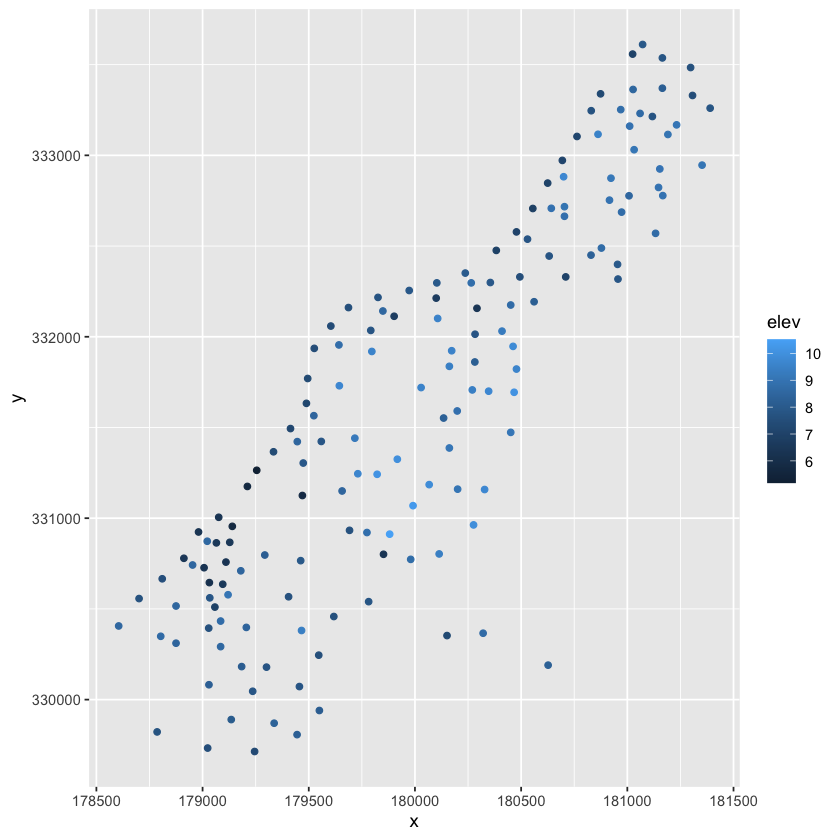

In [5]:
library(ggplot2)
ggplot(meuse, aes(x, y, colour=elev)) + geom_point()

## Filling in gaps-- or, "Point to Grid"

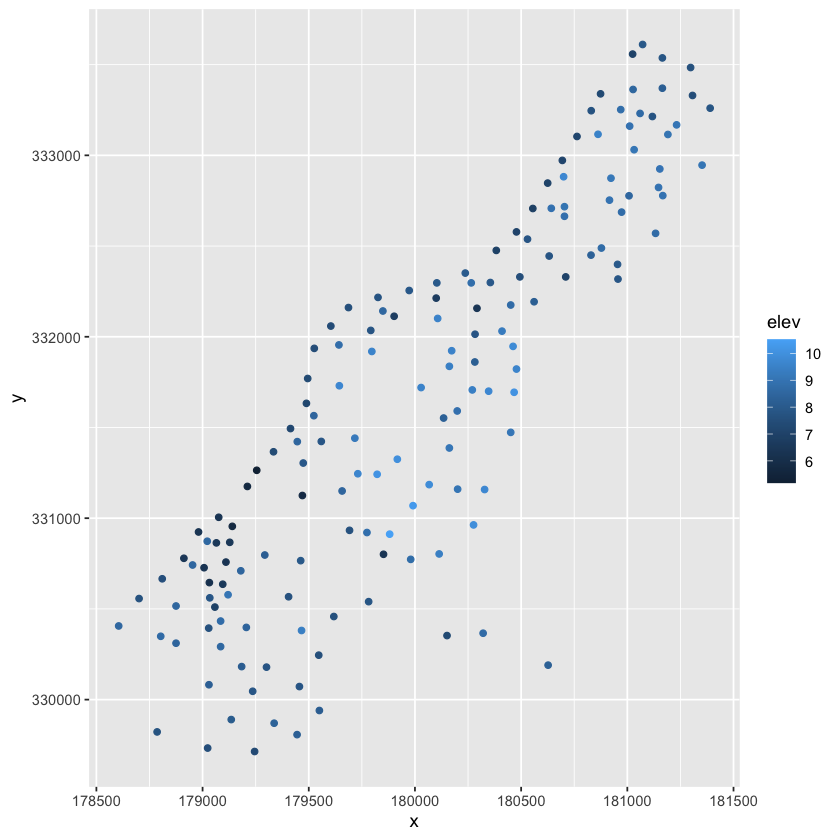

In [6]:
library(ggplot2)
ggplot(meuse, aes(x, y, colour=elev)) + geom_point()

Want to predict elevation at a new location.

In [7]:
x.new = 180000
y.new = 331000

Version 1: Nearest neighbors

Step 1: Calculate distance to every other point.

In [8]:
dists = sqrt((meuse$x - x.new)^2 + (meuse$y - y.new)^2)

In [9]:
dists

[1] 2822.49978 2755.71933 2791.70092 2802.68800 2671.54431 2653.24330
  [7] 2640.85687 2576.52828 2470.01235 2493.60141 2427.28367 2278.15386
 [13] 2496.95755 2451.62497 2385.80008 2394.45526 2238.07618 2090.55495
 [19] 1949.88051 1794.95794 1824.67203 1855.72223 1806.79606 2243.88814
 [25] 2153.81940 2126.77526 2042.98629 1947.48504 1977.89408 2369.56114
 [31] 1936.12732 1728.58468 1670.25178 1693.31539 1628.20760 1507.64717
 [37] 1577.16486 1626.75874 1648.80805 1524.88196 1418.77976 1318.32090
 [43] 1258.58095 1109.53188 1346.63507 1193.27826 1052.75116  906.00497
 [49]  756.80182  623.60404  568.26842 1371.63042 1301.08339 1255.29040
 [55] 1229.37586 1202.45166 1055.69361 1117.30614 1217.11503 1130.61797
 [61] 1049.17682  920.82843  813.51706  766.44113  759.94210  790.39294
 [67]  544.54109  315.20311  248.00202  861.17652  882.08446  944.83914
 [73] 1029.84368  922.31448 1031.04268  975.45938 1061.82108 1235.98382
 [79] 1110.21845 1021.83022  924.01353  664.38694  808.17449 2480.26611
 [85]  607.52942  611.07283  986.21144 1078.31953 1224.69629 1362.57477
 [91] 1144.58595 1516.19953 1372.46129  880.47374 1078.25878  735.87635
 [97]  586.68561  735.56645  869.77008  996.41357  663.08974  509.04224
[103]  227.87935  196.75874  419.53903  653.55183  364.07142  278.46903
[109]  227.60712  148.00338  239.40969  374.36480  363.84887  523.99427
[115]  696.41941  738.78346  812.17978  710.63141  852.53328  720.58379
[121]  941.15355 1019.89656 1151.93967 1323.79530 1106.18715 1053.68544
[127]  950.87749  781.28676 2284.84135 2007.96514  256.90660  939.07295
[133] 2088.97224  836.49567  335.43107  300.41305   69.58448  975.95287
[139] 1061.07351 1076.43579 1222.21602 1075.69512 1151.56415 1315.77886
[145] 1310.14083 1491.24813 1599.33267 1691.59097 1407.24021 1335.52387
[151] 1155.41335 1156.93085 1319.22174  817.50657 1024.31880

Step 2: Choose the nearest neighbors

In [10]:
which.min(dists)

[1] 137

In [11]:
meuse$elev[125]

[1] 9.523

In [12]:
dists[order(dists)]

[1]   69.58448  148.00338  196.75874  227.60712  227.87935  239.40969
  [7]  248.00202  256.90660  278.46903  300.41305  315.20311  335.43107
 [13]  363.84887  364.07142  374.36480  419.53903  509.04224  523.99427
 [19]  544.54109  568.26842  586.68561  607.52942  611.07283  623.60404
 [25]  653.55183  663.08974  664.38694  696.41941  710.63141  720.58379
 [31]  735.56645  735.87635  738.78346  756.80182  759.94210  766.44113
 [37]  781.28676  790.39294  808.17449  812.17978  813.51706  817.50657
 [43]  836.49567  852.53328  861.17652  869.77008  880.47374  882.08446
 [49]  906.00497  920.82843  922.31448  924.01353  939.07295  941.15355
 [55]  944.83914  950.87749  975.45938  975.95287  986.21144  996.41357
 [61] 1019.89656 1021.83022 1024.31880 1029.84368 1031.04268 1049.17682
 [67] 1052.75116 1053.68544 1055.69361 1061.07351 1061.82108 1075.69512
 [73] 1076.43579 1078.25878 1078.31953 1106.18715 1109.53188 1110.21845
 [79] 1117.30614 1130.61797 1144.58595 1151.56415 1151.93967 1155.41335
 [85] 1156.93085 1193.27826 1202.45166 1217.11503 1222.21602 1224.69629
 [91] 1229.37586 1235.98382 1255.29040 1258.58095 1301.08339 1310.14083
 [97] 1315.77886 1318.32090 1319.22174 1323.79530 1335.52387 1346.63507
[103] 1362.57477 1371.63042 1372.46129 1407.24021 1418.77976 1491.24813
[109] 1507.64717 1516.19953 1524.88196 1577.16486 1599.33267 1626.75874
[115] 1628.20760 1648.80805 1670.25178 1691.59097 1693.31539 1728.58468
[121] 1794.95794 1806.79606 1824.67203 1855.72223 1936.12732 1947.48504
[127] 1949.88051 1977.89408 2007.96514 2042.98629 2088.97224 2090.55495
[133] 2126.77526 2153.81940 2238.07618 2243.88814 2278.15386 2284.84135
[139] 2369.56114 2385.80008 2394.45526 2427.28367 2451.62497 2470.01235
[145] 2480.26611 2493.60141 2496.95755 2576.52828 2640.85687 2653.24330
[151] 2671.54431 2755.71933 2791.70092 2802.68800 2822.49978

In [13]:
order(dists)[1:3]

[1] 137 110 104

In [14]:
mean(meuse$elev[order(dists)[1:3]])

[1] 10.23967

Version 2: The variogram

For every pair of points, calculate $(y_i - y_j)^2$.

In [15]:
results = data.frame()
for (ii in 1:nrow(meuse))
    for (jj in 1:nrow(meuse)) {
        dist = sqrt((meuse$x[ii] - meuse$x[jj])^2 + (meuse$y[ii] - meuse$y[jj])^2)
        sqrdiff = (meuse$elev[ii] - meuse$elev[jj])^2
        results = rbind(results, data.frame(dist, sqrdiff))
    }

In [16]:
nrow(results)

[1] 24025

Warning message:
“Removed 7130 rows containing missing values or values outside the scale range
(`geom_point()`).”


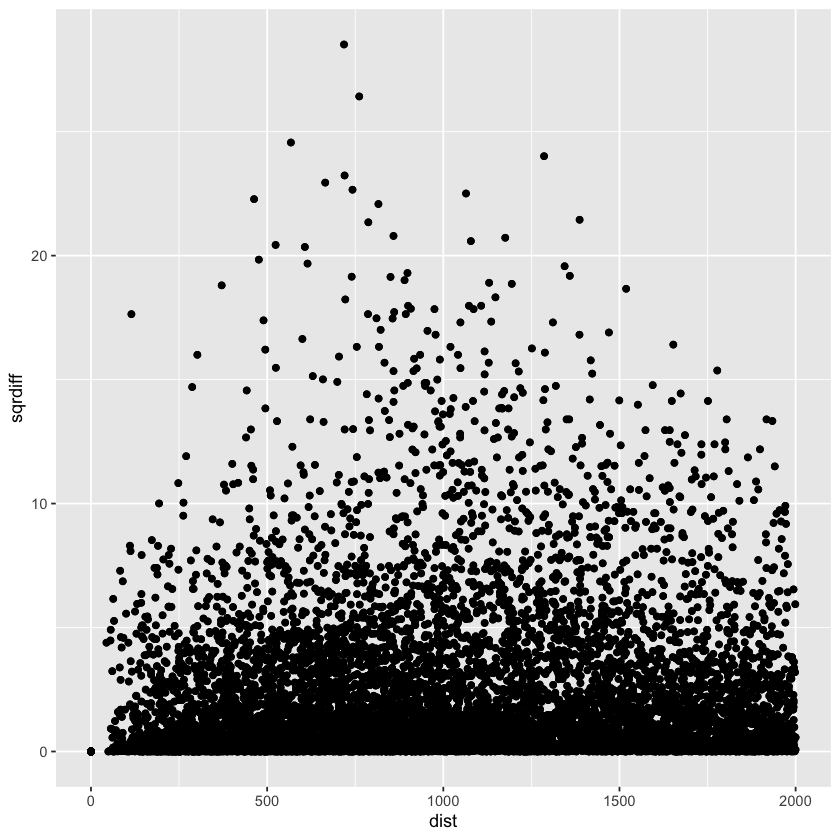

In [17]:
ggplot(results, aes(dist, sqrdiff)) + geom_point() + xlim(0, 2000)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 7130 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 7130 rows containing missing values or values outside the scale range
(`geom_point()`).”


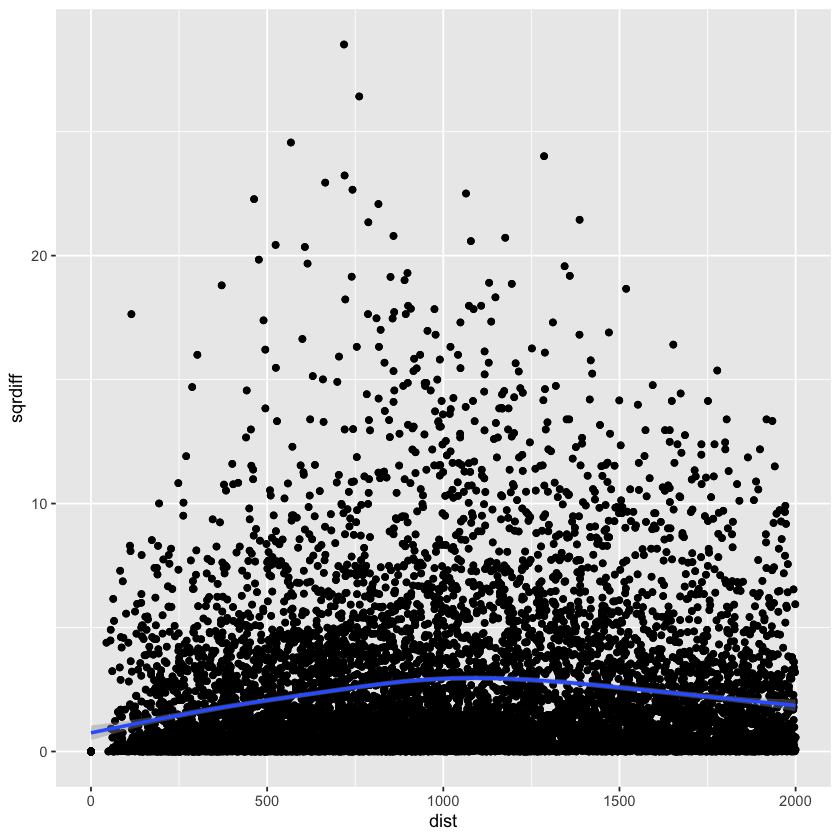

In [18]:
ggplot(results, aes(dist, sqrdiff)) + geom_point() + geom_smooth() + xlim(0, 2000)

Use R package

In [19]:
install.packages("gstat")
install.packages("geojsonio")
library(gstat)


The downloaded binary packages are in
	/var/folders/rl/p7xkj5n56gb2hxfnwbc696x80000gn/T//Rtmpav2qjV/downloaded_packages

The downloaded binary packages are in
	/var/folders/rl/p7xkj5n56gb2hxfnwbc696x80000gn/T//Rtmpav2qjV/downloaded_packages


In [20]:
coordinates(meuse) = ~ x + y

In [21]:
mod <- variogram(elev ~ 1, meuse)

In [22]:
mod

np,dist,gamma,dir.hor,dir.ver,id
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
57,79.29244,0.8004207,0,0,var1
299,163.97367,0.7185617,0,0,var1
419,267.36483,0.7242056,0,0,var1
457,372.73542,0.8585302,0,0,var1
547,478.47670,1.0551624,0,0,var1
533,585.34058,1.0921122,0,0,var1
574,693.14526,1.2139753,0,0,var1
564,796.18365,1.3036289,0,0,var1
589,903.14650,1.4419341,0,0,var1


In [23]:
fit <- fit.variogram(mod, model=vgm("Sph"))

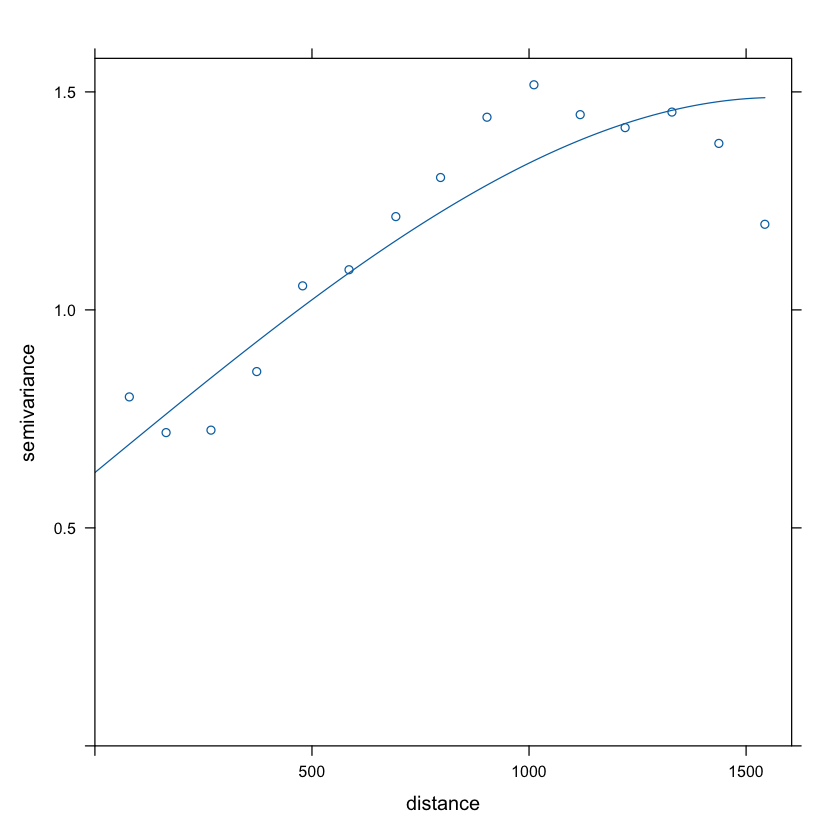

In [24]:
plot(mod, fit)

In [25]:
grid = expand.grid(x=seq(min(meuse$x), max(meuse$x), length.out=100), y=seq(min(meuse$y), max(meuse$y), length.out=100))

In [26]:
coordinates(grid) <- ~ x + y

In [27]:
kriged <- krige(elev ~ 1, meuse, grid, model=fit)

[using ordinary kriging]


In [28]:
head(kriged)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson



         coordinates var1.pred  var1.var
1   (178605, 329714)  7.983477 1.1115266
2 (178633.1, 329714)  7.980150 1.0873645
3 (178661.3, 329714)  7.976164 1.0631856
4 (178689.4, 329714)  7.971698 1.0393600
5 (178717.5, 329714)  7.967016 1.0164541
6 (178745.7, 329714)  7.961181 0.9952459

In [29]:
grid$elev = kriged$var1.pred

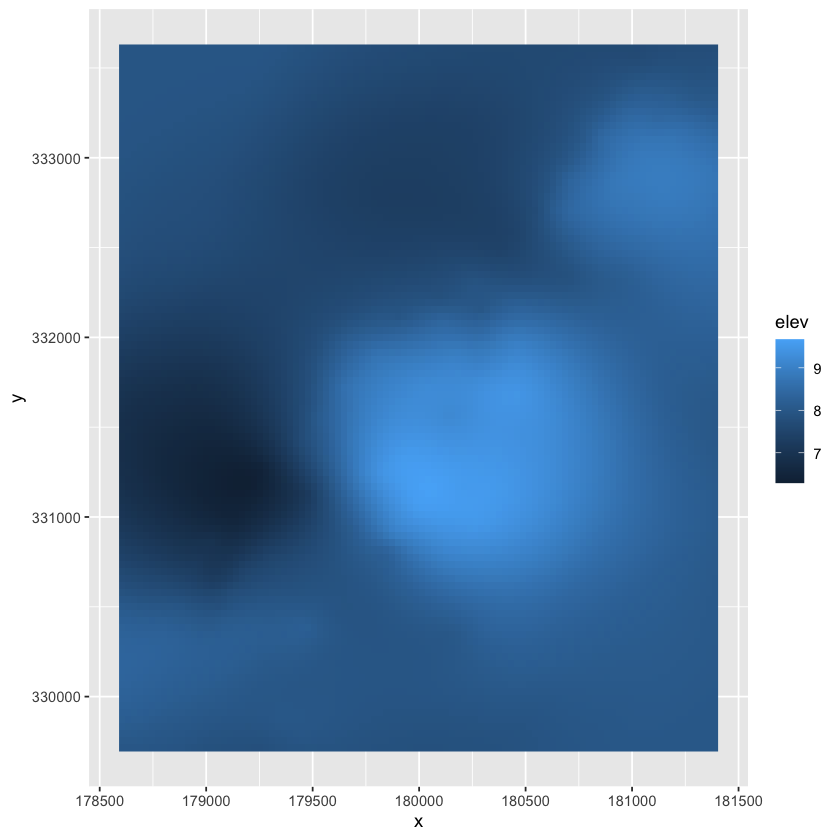

In [30]:
ggplot(as.data.frame(grid), aes(x, y, fill=elev)) + geom_raster()

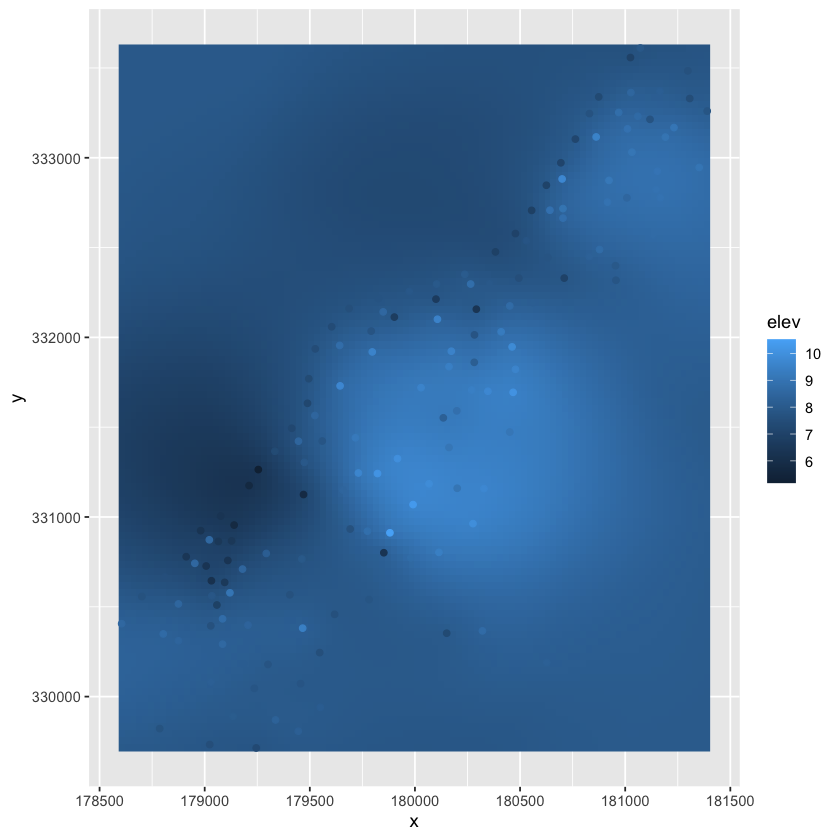

In [31]:
ggplot(as.data.frame(grid), aes(x, y, fill=elev)) + geom_raster() + geom_point(data=as.data.frame(meuse), aes(colour=elev))

In [32]:
fit$psill[1] = 0

In [33]:
kriged <- krige(elev ~ 1, meuse, grid, model=fit)

[using ordinary kriging]


In [34]:
grid$elev = kriged$var1.pred

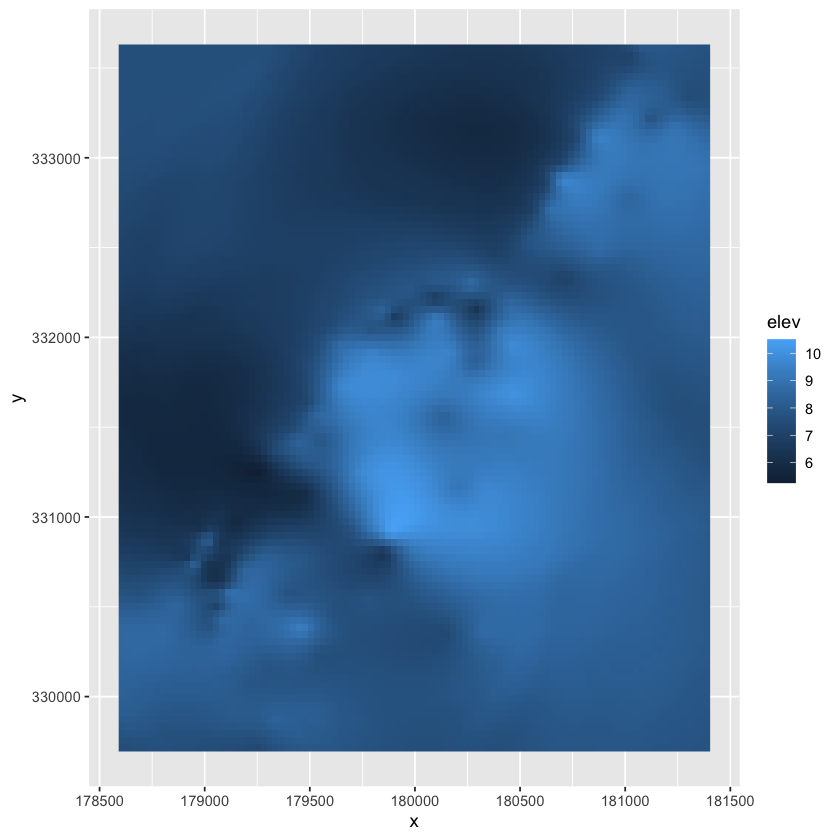

In [35]:
ggplot(as.data.frame(grid), aes(x, y, fill=elev)) + geom_raster()